[INFO] 601 matched locations *before* NMS


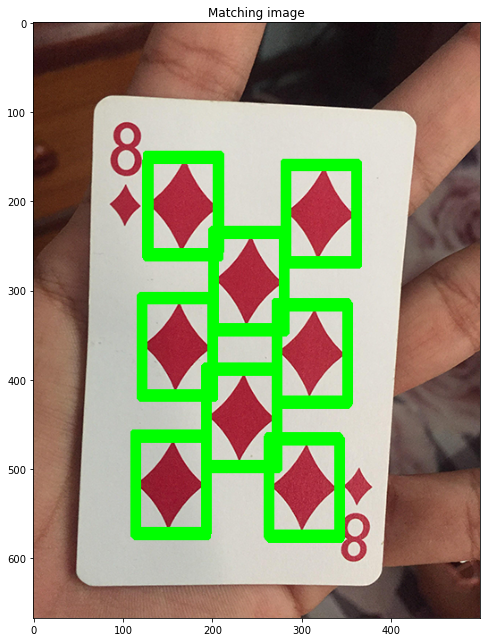

In [1]:
from imutils.object_detection import non_max_suppression
import cv2
import numpy as np
from matplotlib import pyplot as plt

#Create path, load image and template
path1 = '../images/8_diamonds.png'
path2 = '../images/diamonds_template.png'
image = cv2.imread(path1)
template = cv2.imread(path2)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
template = cv2.cvtColor(template, cv2.COLOR_BGR2RGB)
imageGray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
templateGray = cv2.cvtColor(template, cv2.COLOR_RGB2GRAY)

#Assign threshold value
threshold = 0.8

#get the size (HxW) of template
(tH, tW) = template.shape[:2]

#perform template matching
result = cv2.matchTemplate(imageGray, templateGray, cv2.TM_CCOEFF_NORMED)

# find all locations in the result map where the matched value is
# greater than the threshold, then clone our original image so we
# can draw on it
(yCoords, xCoords) = np.where(result >= threshold)
clone = image.copy()
print("[INFO] {} matched locations *before* NMS".format(len(yCoords)))

# loop over our starting (x, y)-coordinates
for (x, y) in zip(xCoords, yCoords):
	# draw the bounding box on the image
	cv2.rectangle(clone, (x, y), (x + tW, y + tH), (0, 255, 0), 3)

#Show the output image via Matplotlib
fig = plt.figure(figsize=(8, 14))
#Ax1
ax = fig.add_subplot(1, 1, 1)
ax.set_title("Matching image")
ax.imshow(clone)

[INFO] 8 matched locations *after* NMS


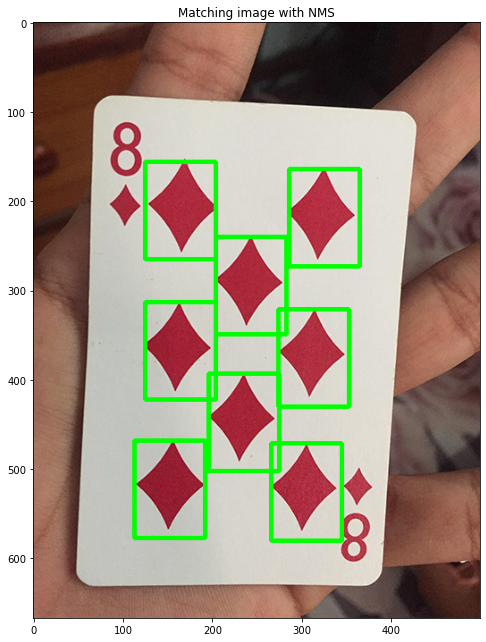

In [3]:
#initialize our list of rectangles
rects = []

#loop over the starting (x, y)-coordinates again
for (x, y) in zip(xCoords, yCoords):
	# update our list of rectangles
	rects.append((x, y, x + tW, y + tH))
    
#apply non-maxima suppression to the rectangles
pick = non_max_suppression(np.array(rects))
print("[INFO] {} matched locations *after* NMS".format(len(pick)))

#loop over the final bounding boxes
for (startX, startY, endX, endY) in pick:
	# draw the bounding box on the image
	cv2.rectangle(image, (startX, startY), (endX, endY), (0, 255, 0), 3)
    
#show the output image
fig2 = plt.figure(figsize=(8, 14))
#Ax1
ax1 = fig2.add_subplot(1, 1, 1)
ax1.set_title("Matching image with NMS")
ax1.imshow(image)